## 2.1 Introduction<a id='2.2_Introduction'></a>


This step focuses on collecting your data, organizing it, and making sure it's well defined. 

### 2.1.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>


In this project, we are trying to create a fraud detection system to predict fraud from the data provided on kaggle 
https://www.kaggle.com/shivamb/vehicle-claim-fraud-detection

## 2.3 Imports<a id='2.3_Imports'></a>

In [3]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2.4 Objectives<a id='2.4_Objectives'></a>

The objectives of this project is to determine the variables leading to fraudulent transactions in auto claims

## 2.5 Load The Vehicle Claim Data 

In [4]:
vf = pd.read_csv("fraud_oracle.csv")

In [6]:
#Calling  the info method on vf to see info about the data
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

<b> Luckily the data looks pretty clean without any missing values<b>

In [7]:
# Verifying the number of missing values in each feature
vf.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

##### We do not have any missing values

In [9]:
# Calling  the head method on vf to print the first several rows of the data
vf.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [10]:
vf.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

 Amongst the column list above most of the column seems categorical, apart from deductible.
 Since we are trying to model the fraudulent transaction the " FraudFound_P" is our target variable which is binary 

### Checking the numerical features 


In [12]:
vf.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Amongst the numeric features week of month, week of month claimed, fraud found, driver rating seems categorical and since policy number, rep number are distinct values,they need to be converted to string

In [24]:
vf['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

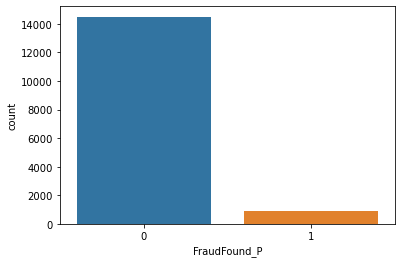

In [28]:
sns.countplot(x='FraudFound_P',data=vf)

[Text(0, 0.5, 'Percent')]

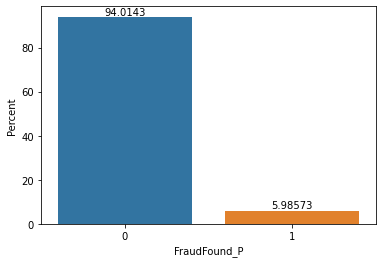

In [33]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax = sns.barplot(x='FraudFound_P', y='FraudFound_P', data=vf, estimator=lambda x: len(x) / len(vf) * 100)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Percent")

#### Checking the contribution of sex type on fruadulent and legitimate claims
#### Note= 0 is fair and 1 is fraudulent claims

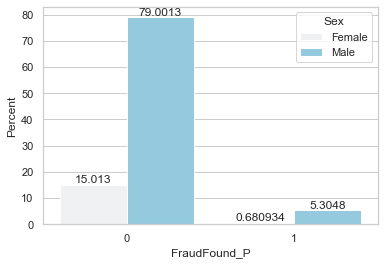

In [57]:
sns.set(style="whitegrid")  
ax=sns.barplot(data=vf,x='FraudFound_P', y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")

fig.tight_layout()

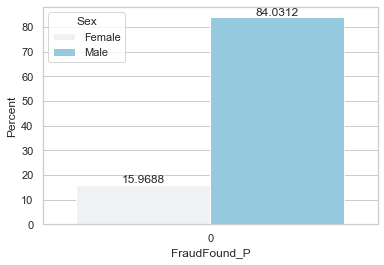

In [62]:
vf1=vf.loc[vf['FraudFound_P']==0]
sns.set(style="whitegrid")  
ax=sns.barplot(data=vf1,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf1) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")

fig.tight_layout()

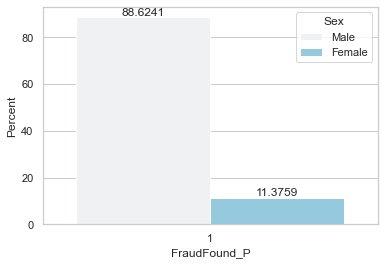

In [79]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf2,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")

fig.tight_layout()

 Close to 94% (14497 claims) tranaction are fair and 6%(923 claims) are fraudulent. However, amongst the total claims males contribute 84.03% for non-fraudulent transactions but contribute 88.62% of fraudulent transactions. Males are more likely to submit fraudulent claims

#### Checking for impact of age on claims

AttributeError: 'QuadMesh' object has no property 'estimator'

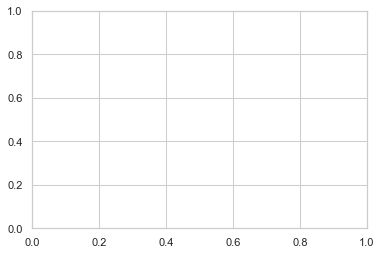

In [77]:

sns.set(style="whitegrid")  
figsize=(200,6)
ax=sns.histplot(data=vf,x='Age',y='Age',hue='FraudFound_P', color="skyblue",estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")

fig.tight_layout()

Close to 94% (14497 claims) tranaction are fair and 6%(923 claims) are fraudulent

In [29]:
'''
## Source Code from https://newbedev.com/python-seaborn-countplot-show-percentage-code-example
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
'''

"\n## Source Code from https://newbedev.com/python-seaborn-countplot-show-percentage-code-example\n    \ndef with_hue(plot, feature, Number_of_categories, hue_categories):\n    a = [p.get_height() for p in plot.patches]\n    patch = [p for p in plot.patches]\n    for i in range(Number_of_categories):\n        total = feature.value_counts().values[i]\n        for j in range(hue_categories):\n            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)\n            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15\n            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() \n            ax.annotate(percentage, (x, y), size = 12)\n    plt.show()\n\ndef without_hue(plot, feature):\n    total = len(feature)\n    for p in ax.patches:\n        percentage = '{:.1f}%'.format(100 * p.get_height()/total)\n        x = p.get_x() + p.get_width() / 2 - 0.05\n       